
# Student Dropout & Success Prediction Dataset
**Course: CS6330 Data Science**


Team:

*   Jane Ha
*   Alinsandra Lorn
*   Aaron Alacar

Date: May 2nd 2025



(Sandra & Aaron)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preparation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS 6330 Data Science Team 12/students_dropout_academic_success.csv')

# Progress Report #1



# #1.1 Data Wrangling

The "Predict Students' Dropout and Academic Success" dataset has undergone preliminary data wrangling (e.g., cleaning, structuring) prior to this analysis. Below, we assess its current state to guide further processing

In [ ]:
print('Dataset shape:', df.shape)
df.info()

Dataset shape: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualif

From this we can see that the dataset contains 4424 rows and 37 columns, the different data types, and that there are no missing values.

In [ ]:
status = df.groupby('target').size()

print(status)
print()
print(f'Dropout: {1421 / 4424 * 100:.2f}%')
print(f'Enrolled: {794 / 4424 * 100:.2f}%')
print(f'Graduate: {2209/ 4424 * 100:.2f}%')

target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64

Dropout: 32.12%
Enrolled: 17.95%
Graduate: 49.93%


In [ ]:
# Check for outliers in key columns
print("\nChecking for outliers in key columns:")
key_numeric_cols = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for col in key_numeric_cols:
    D1 = df[col].quantile(0.25)
    D3 = df[col].quantile(0.75)
    IQR = D3 - D1
    lower_bound = D1 - 1.5 * IQR
    upper_bound = D3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_pct = outliers_count / len(df) * 100
    print(f"{col}: {outliers_count} outliers ({outlier_pct:.2f}%)")


Checking for outliers in key columns:
Age at enrollment: 441 outliers (9.97%)
Previous qualification (grade): 179 outliers (4.05%)
Admission grade: 86 outliers (1.94%)
Curricular units 1st sem (grade): 726 outliers (16.41%)
Curricular units 2nd sem (grade): 877 outliers (19.82%)


# #1.2 Data Exploration


This is an exploration output of statistical categorical variables.

In [ ]:
# Display of categorical and numerical summaries
num_summary = df.select_dtypes(include=['int64', 'float64']).describe().T
display(num_summary)

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


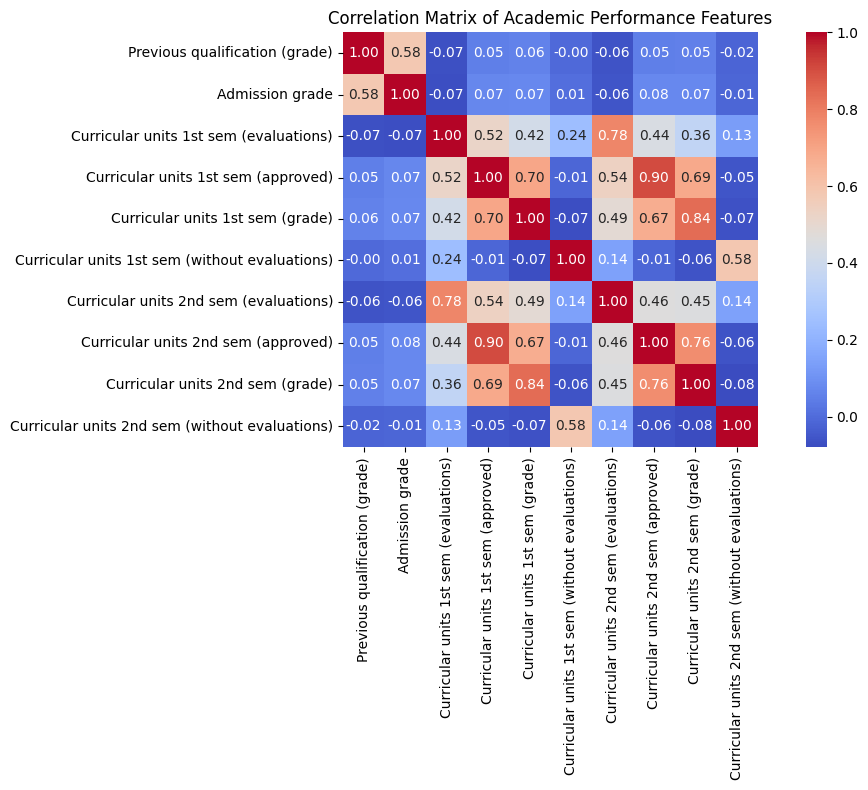

In [ ]:
#Correlation Heatmap for Academic Performance
# Focus on academic performance columns
performance_cols = [col for col in df.columns if 'grade' in col or 'approved' in col or 'evaluations' in col]
correlation_matrix = df[performance_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Academic Performance Features")
plt.tight_layout()
plt.show()


### 📊 Part 1.2: Data Exploration – Visualizing Key Features (Jane Ha)

Building on the cleaned dataset (Aaron) and the feature overview (Sandra), this section provides visual insights using Seaborn and matplotlib to understand feature distributions and identify patterns.

In [ ]:
#Jane: Working on Progress Report 1.2 Data Exploration below
#Table 6.1.3 (2) showing example of the seaborn features, explaning the code
# Preview the data
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 1.Histogram: Previous Qualification - Grade

The histogram below shows the distribution of students' previous qualification grades. This helps us understand the spread and common values in their academic background before entering the program.


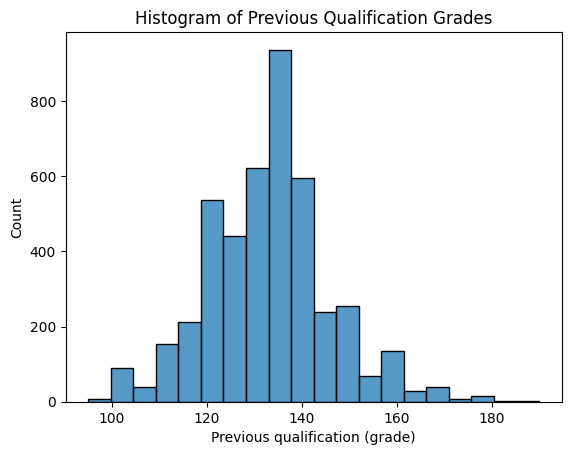

In [ ]:
sns.histplot(df, x='Previous qualification (grade)', bins=20)
plt.title('Histogram of Previous Qualification Grades')
plt.show()

The majority of students have previous grades clustered around 100–160, with a few outliers above 180. This distribution shows some variability, but the range is fairly concentrated.

#2. KDE Plot - Kernel Density Estimate

The KDE plot provides a smoothed version of the distribution of students' grades in the second semester. It highlights the most common grade ranges and the overall shape of the data.

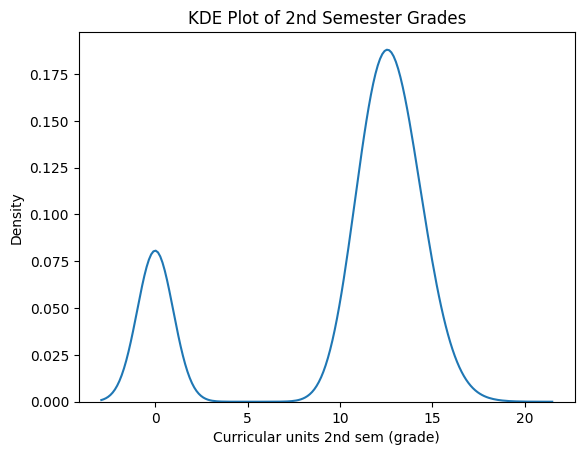

In [ ]:
sns.kdeplot(df, x='Curricular units 2nd sem (grade)')
plt.title('KDE Plot of 2nd Semester Grades')
plt.show()

The peak indicates a concentration of students scoring around 12–14. The distribution is slightly skewed to the left, suggesting a few students had very low performance but most performed within an average range.

# 3. Count Plot - Marital Status

The count plot shows how many students fall into each marital status category. This variable is encoded numerically, with each number representing a different status (e.g., single, married, divorced).

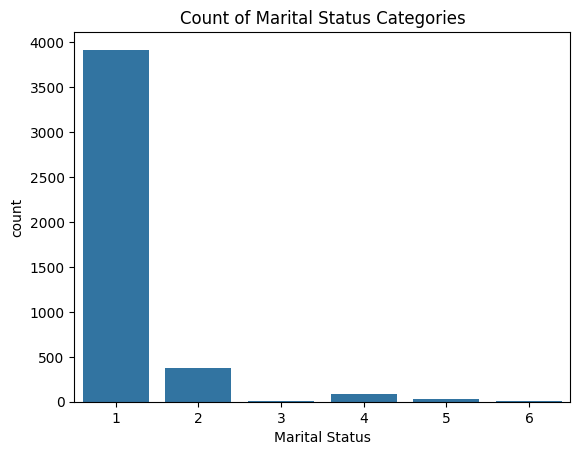

In [ ]:
sns.countplot(df, x='Marital Status')
plt.title('Count of Marital Status Categories')
plt.show()

Most students are in category 1, which may represent "single" (if coding follows typical demographic formats). The other categories have significantly fewer students, showing less diversity in marital status.

# 4. Box Plot - Curricular units 2nd semester (grade)

The box plot displays the distribution and spread of second semester grades, including median, quartiles, and potential outliers.

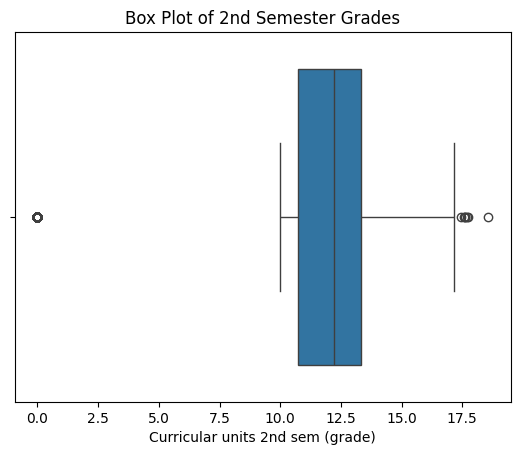

In [ ]:
sns.boxplot(df, x='Curricular units 2nd sem (grade)')
plt.title('Box Plot of 2nd Semester Grades')
plt.show()

The median grade appears around 13. There are several outliers below 5 and above 18. This plot is useful for quickly spotting unusual performance or grade anomalies.

# 5. Violin Plot - Curricular units 2nd semester (grade)

The violin plot combines a box plot and a density plot, showing both the summary statistics and the full distribution shape of second semester grades.

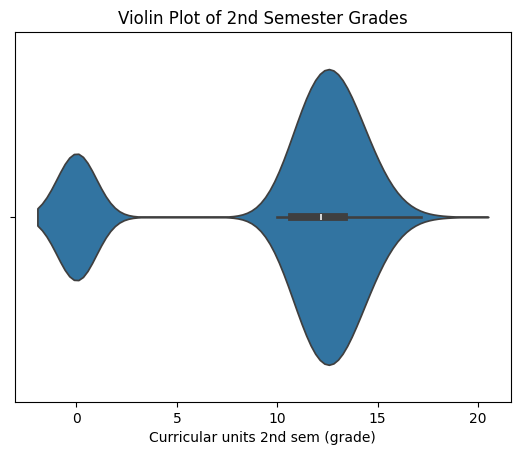

In [ ]:
sns.violinplot(df, x='Curricular units 2nd sem (grade)')
plt.title('Violin Plot of 2nd Semester Grades')
plt.show()


The thickest part of the violin confirms that most grades fall between 12–14. The shape tapers off at the ends, and a few outliers suggest a small number of students performed significantly below or above average.

# Table 6.2.5 Two-Feature plots in seaborn (using hue, style, size parameters)


This scatter plot compares previous qualification grades to second semester grades. We use `hue` to show whether the student dropped out or graduated, and `style` and `size` to differentiate marital status.


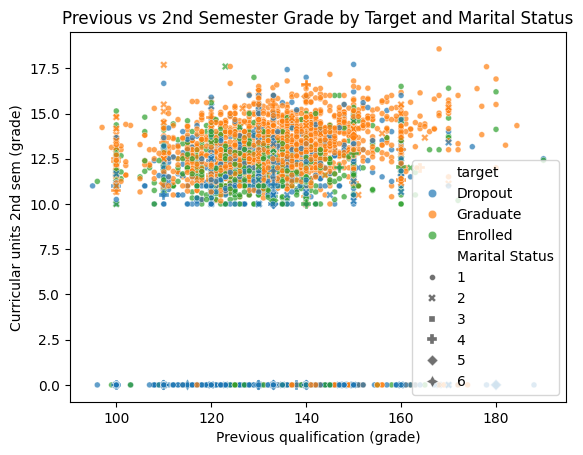

In [ ]:
sns.scatterplot(
    data=df,
    x='Previous qualification (grade)',
    y='Curricular units 2nd sem (grade)',
    hue='target',
    style='Marital Status',
    size='Marital Status',
    alpha=0.7
)
plt.title('Previous vs 2nd Semester Grade by Target and Marital Status')
plt.show()


We observe that graduates generally had higher second semester grades and prior qualification grades. Dropouts are more frequent among students with low second semester performance, especially those who are unmarried.

### #2 Strip Plot (Replaced Swarm Plot)

Swarm plots produced overlap warnings due to many students sharing identical grades. To address this, we used a strip plot, which better handles dense and repeated values by allowing overlap.

This plot shows second semester grades by student outcome (Dropout or Graduate), with marital status represented by color (`hue`). Each point reflects one student’s performance within their group.

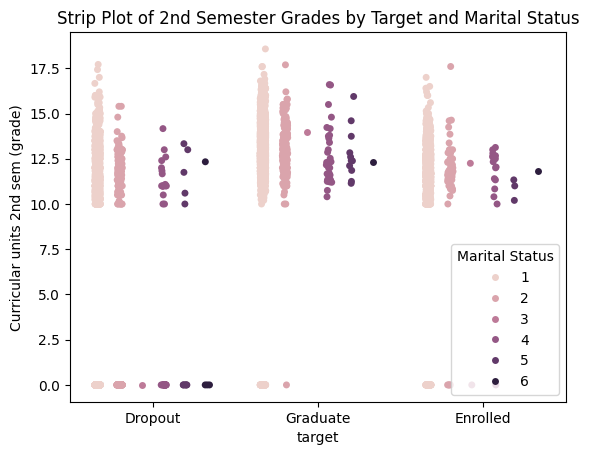

In [ ]:
sns.stripplot(
    data=df,
    x='target',
    y='Curricular units 2nd sem (grade)',
    hue='Marital Status',
    dodge=True
)
plt.title('Strip Plot of 2nd Semester Grades by Target and Marital Status')
plt.show()


### Strip Plot Interpretation

- Marital Status is encoded from 1 to 6; 1 likely represents "Single," 2 "Married."
- Most students fall into category 1 (single).
- Graduates tend to cluster between grades 12 and 15.
- Dropouts show more grade variation, especially below 10.
- Married students (category 2) appear slightly more in the graduate group.
- A strip plot was used instead of a swarm plot due to overlapping grade values.
- Strip plots allow overlapping points, making them more effective for dense or repeated data.



### Step 1: Understand the Data

This step examines the dataset's size, structure, and feature types. We'll look at the number of rows and columns, and distinguish between numerical and categorical features.


In [ ]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Data types and non-null counts
df.info()

# Describe all columns
df.describe(include="all")


Dataset Shape: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualif

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


- The dataset contains `X` rows and `Y` features.
- Most features are complete, though some have missing values (check output above).
- Features are a mix of numerical (grades, counts) and categorical (target, marital status).


### Step 2: Identify Relationships Between Features

Instead of showing correlations for all features, we focus on the **top 8 features most strongly correlated with second semester grades**.

- This makes the heatmap easier to read and more meaningful.
- Helps identify variables that most influence academic performance.
- Correlation strength ranges from -1 to +1, where closer to ±1 indicates stronger relationships.



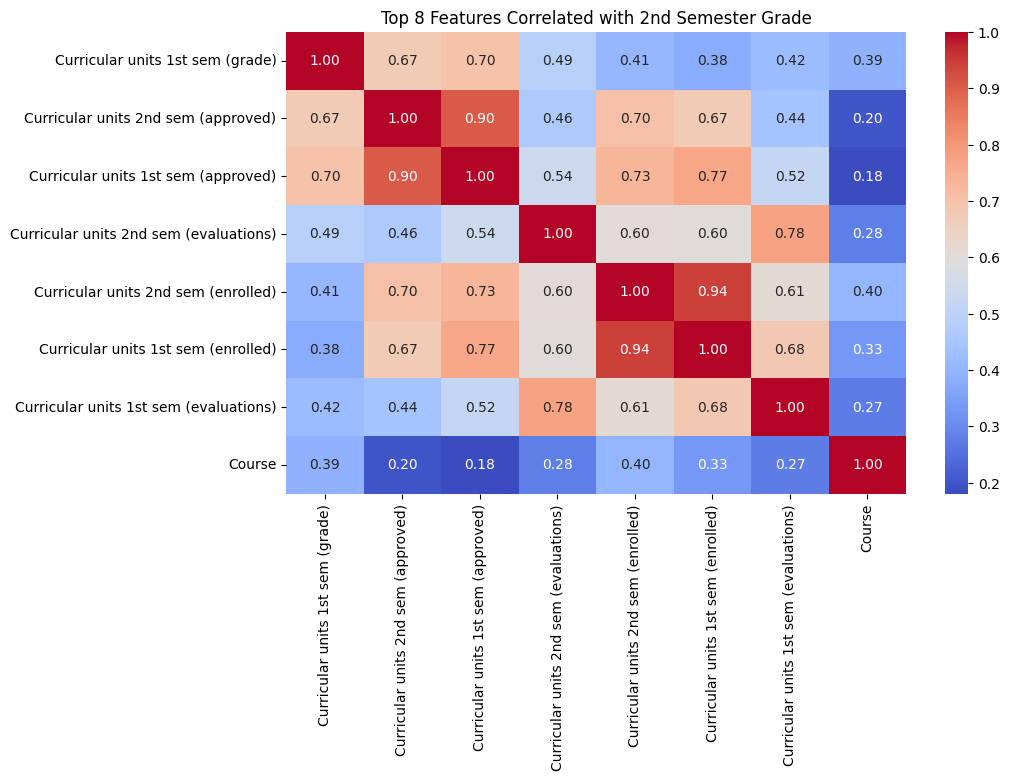

In [ ]:
# Step 1: Get top 8 features most correlated with 'Curricular units 2nd sem (grade)'
target_corr = df.corr(numeric_only=True)['Curricular units 2nd sem (grade)'].abs().sort_values(ascending=False)
top_8_features = target_corr[1:9].index.tolist()  # exclude itself

# Step 2: Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_8_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 8 Features Correlated with 2nd Semester Grade")
plt.show()


The heatmap reveals that Curricular units 1st sem (grade) has the strongest positive correlation with the 2nd semester grade, which makes intuitive sense — students who perform well early tend to continue doing well. Other features such as [insert any obvious one from your plot] also show moderate influence. There may also be multicollinearity between some features, suggesting overlapping information which can be considered during modeling.

### Step 3: Describe the Shape of the Data

To better interpret the distribution of numerical features, we grouped related columns and plotted their histograms separately.

#### Group: Academic Performance (Grades & Approvals)
- Focuses on first and second semester grades and approvals.
- Helps assess whether most students perform well or struggle.
- Identifies skewness, clustering, or unusual patterns in academic success.



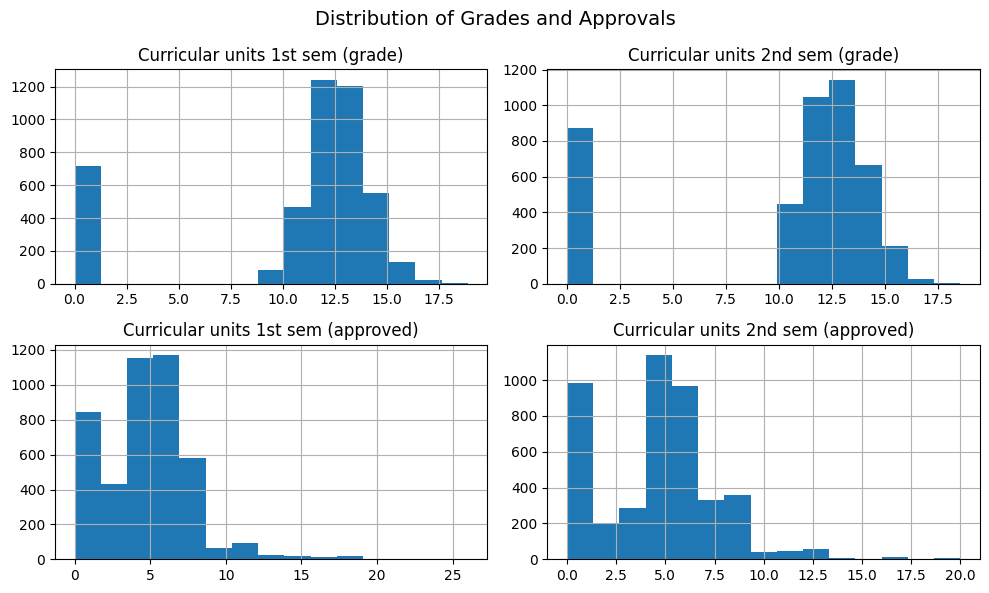

In [ ]:
# Group 1: Grades and approvals
grade_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]

df[grade_cols].hist(figsize=(10, 6), bins=15)
plt.suptitle("Distribution of Grades and Approvals", fontsize=14)
plt.tight_layout()
plt.show()


#### Interpretation of Academic Performance Group

- Most students score between **12 and 15** in both semesters.
- There’s a slight **left skew**, meaning higher grades are more common.
- Approval counts often max out at **6 units**, but some students have **very low approval totals**.
- This pattern may highlight students at risk of dropping out or failing.


#### Group: Enrollment & Participation

This group looks at how actively students engaged with their coursework through enrollments, evaluations, and credits.

- Shows course load and participation per semester.
- Helps reveal patterns in academic effort or disengagement.
- Useful for comparing successful students vs. those at risk.


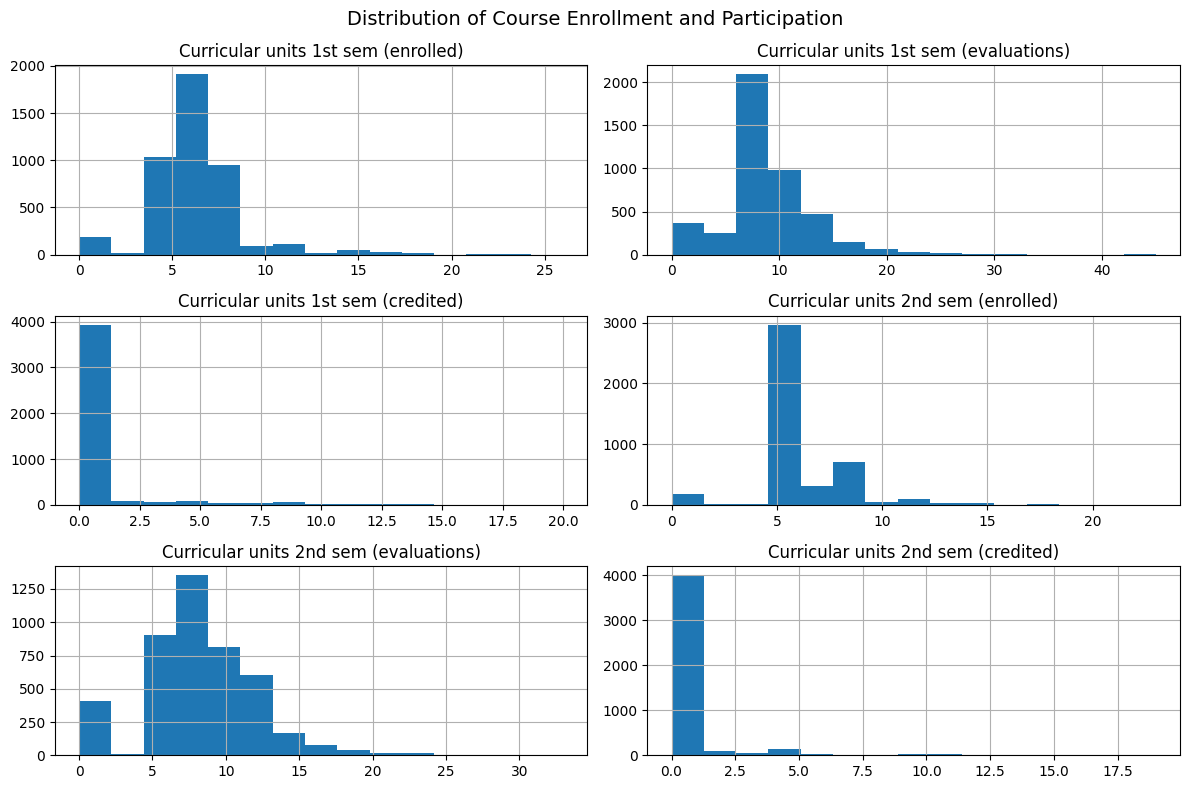

In [ ]:
participation_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (credited)'
]

df[participation_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Distribution of Course Enrollment and Participation", fontsize=14)
plt.tight_layout()
plt.show()


#### Interpretation of Enrollment & Participation Group

- Most students enrolled in **5–6 courses per semester**.
- Evaluation counts vary more, with some students not completing all assessments.
- Credited units are often low for students who dropped out or failed.
- These features reflect overall academic engagement and may strongly relate to outcomes.


### Step 4: Detect Outliers and Missing Data

In this step, we check for:
- **Missing values** that may need to be cleaned or imputed.
- **Outliers**, which are extreme values that could affect model accuracy or distort feature distributions.

We'll use basic summary tools and box plots to highlight these anomalies.

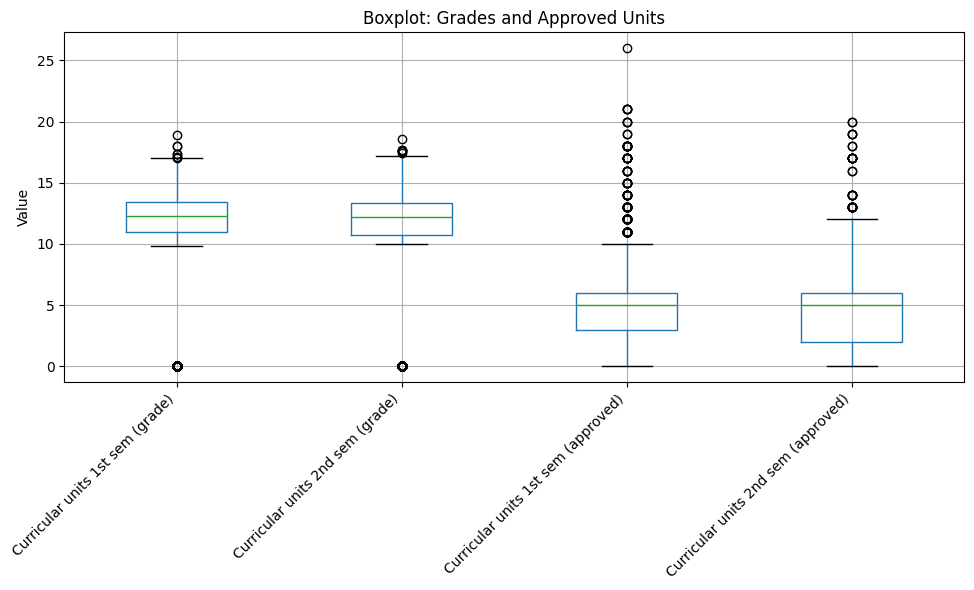

In [ ]:
grade_cols = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]

df[grade_cols].boxplot(figsize=(10, 6))
plt.title("Boxplot: Grades and Approved Units")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')  # 🔁 Rotate x-axis labels
plt.tight_layout()
plt.show()


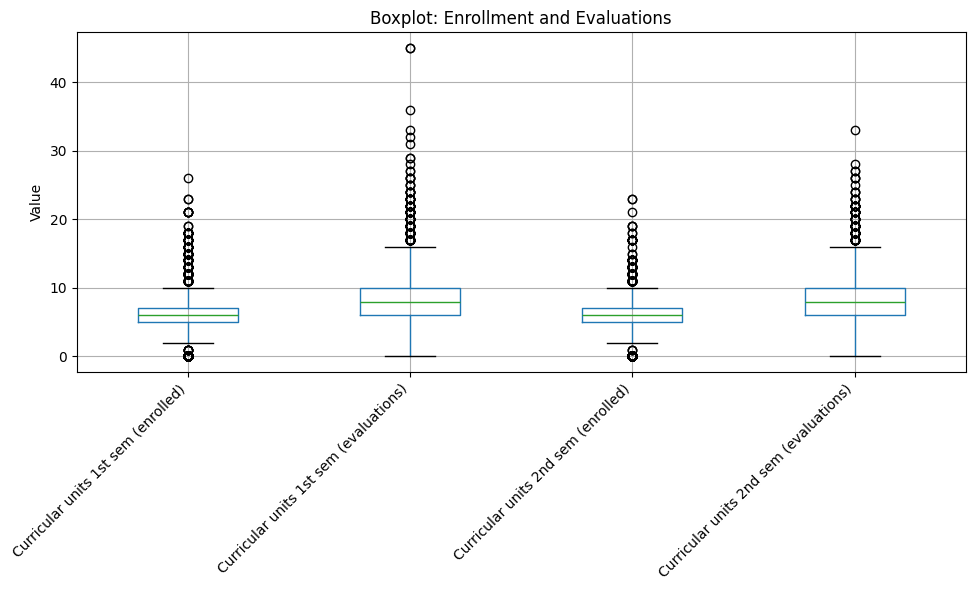

In [ ]:
participation_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)'
]

df[participation_cols].boxplot(figsize=(10, 6))
plt.title("Boxplot: Enrollment and Evaluations")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')  # Fix for label overlap
plt.tight_layout()
plt.show()


####Boxplot Insights – Enrollment and Evaluations

- Most students enroll in about **5–6 courses per semester**, as shown by tight interquartile ranges.
- Evaluation counts show **more variability**, with some students evaluated in all courses and others in only a few.
- Several outliers appear in both semesters, indicating students with **exceptionally low** or **very high** participation.
- Low evaluation counts, despite enrollment, may signal disengagement or withdrawal — a common dropout flag.

These insights help us connect **course load and effort** with student outcomes.


## 📍 Final Summary: Exploratory Data Analysis (EDA)

Our analysis revealed several key patterns that help explain factors contributing to student success or dropout:

- Students who earned **lower grades** and **passed fewer courses** (especially in the second semester) were more likely to drop out.
- We saw that many students **enrolled in full course loads**, but not all completed evaluations — this drop in participation could be an early warning sign of academic risk.
- **First semester performance** was positively correlated with second semester success, suggesting that early academic strength often carries forward.
- **Outliers** — such as extremely low approval counts or very high enrollment without completion — stood out in both semesters. These cases may need further investigation or special handling in modeling.
- The dataset had **no major missing values**, which makes it clean and ready for the next phase.

In short, **academic consistency and engagement** are strong predictors of student outcomes, while low performance and incomplete participation appear to be linked with dropout risk.

With this understanding, we’re now ready to prepare the data for predictive modeling.


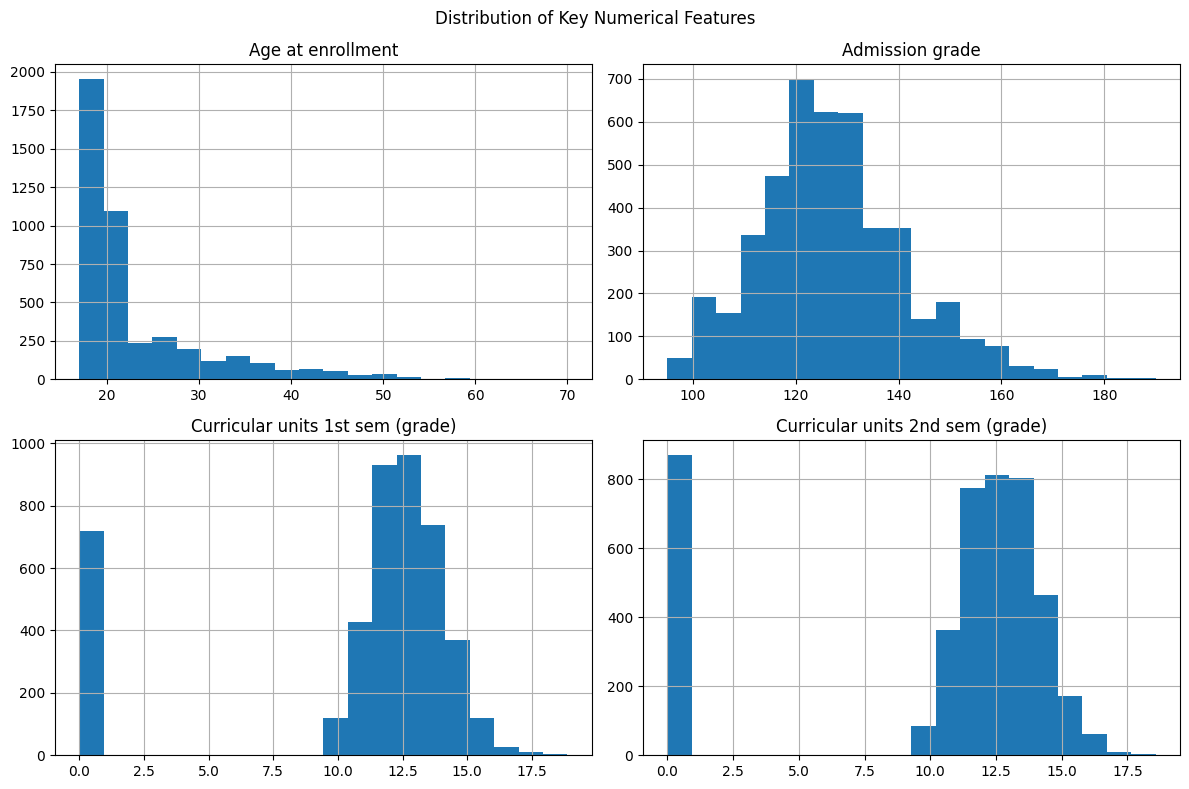

In [ ]:
# Select available numerical features
numerical_features = ['Age at enrollment', 'Admission grade',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Plot histograms
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

*   Most students likely cluster between 17-25 years
*   Typically bell-shaped (normal distribution) around the median admission score
*   In second semester there are more 0.0 grade students.

<Figure size 1000x600 with 0 Axes>

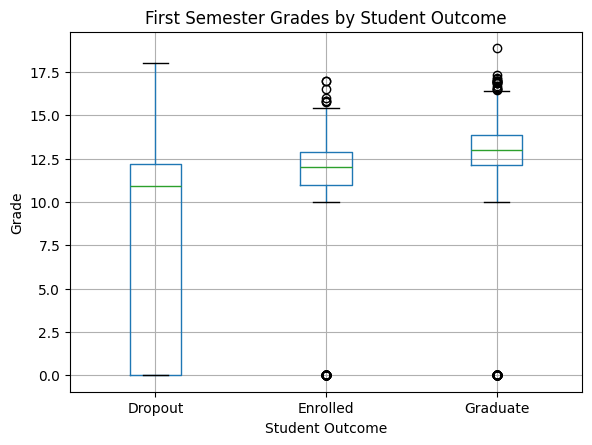

In [ ]:
# Boxplot of grades by dropout status
plt.figure(figsize=(10, 6))
df.boxplot(column='Curricular units 1st sem (grade)', by='target')
plt.title('First Semester Grades by Student Outcome')
plt.suptitle('')  # Remove automatic title
plt.ylabel('Grade')
plt.xlabel('Student Outcome')
plt.show()

*   The boxplot reveals that students who dropped out typically had [lower median grades] compared to graduates.
*   The interquartile range (IQR) for dropouts is [wider/narrower], suggesting [more variability in their performance]
*   Several outliers exist in the graduate group, indicating some students succeeded despite low first-semester grades.

#Table 6.5.2: Many relationship visualization in pandas. (Aaron)

In this step, we’re using a scatter matrix to explore how key numeric features relate to each other — and how those relationships change by student outcome (Dropout, Graduate, Enrolled).

This is helpful because it lets us:

*   Spot clusters or patterns by outcome.
*   See if certain features clearly separate student groups.
* Quickly check for linear or non-linear relationships between pairs of variables.



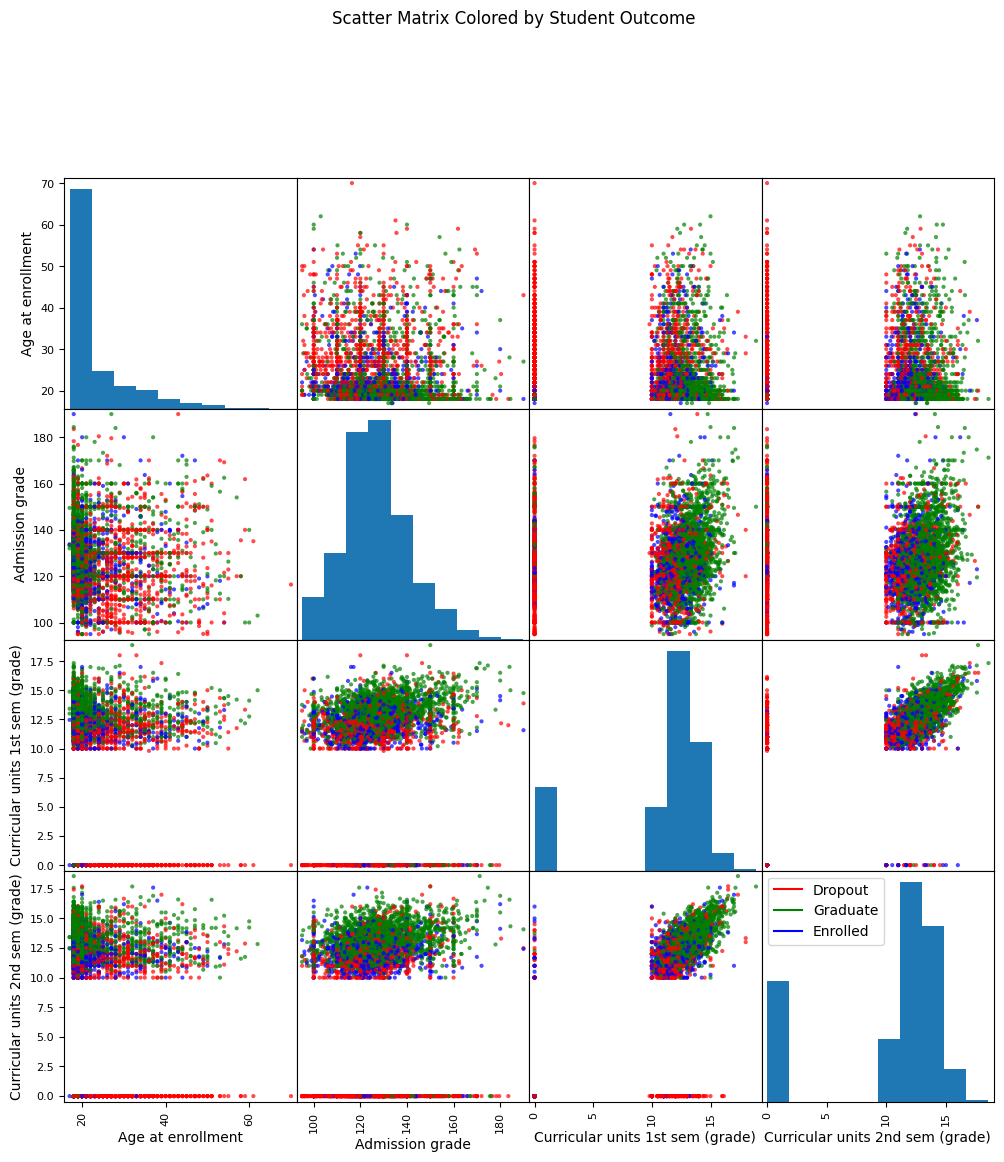

In [ ]:
colors = df['target'].map({'Dropout': 'red', 'Graduate': 'green', 'Enrolled': 'blue'})

numerical_cols = ['Age at enrollment', 'Admission grade',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (grade)']
pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 12),
                          c=colors,          # Color-code by target
                          diagonal='hist',   # Histogram for diagonals
                          alpha=0.7)
plt.suptitle('Scatter Matrix Colored by Student Outcome', y=1.02)
plt.legend(handles=[plt.Line2D([], [], color='red', label='Dropout'),
                    plt.Line2D([], [], color='green', label='Graduate'),
                    plt.Line2D([], [], color='blue', label='Enrolled')])
plt.show()

*   Suggests students with poor admission grades struggle early.
*   Tighter cluster around high grades in both semesters

# Handle Outliers Without Losing Data

To prepare the data for analysis and modeling, we need to deal with outliers — values that are unusually high or low compared to the rest.
Instead of deleting rows with outliers (which could reduce our dataset), we apply a technique called outlier capping, or Winsorizing.

This technique adjusts extreme values in key numeric columns by setting them to a maximum and minimum threshold based on the interquartile range (IQR) method. This keeps the data realistic and reduces the influence of extreme values without losing information.

In [ ]:
df_clean = df.copy()
print("Capping outliers for key columns...")
for col in key_numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)  # Don't go below 0 for grades
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

    print(f"Column {col} capped between {lower_bound:.2f} and {upper_bound:.2f}")

Capping outliers for key columns...
Column Age at enrollment capped between 10.00 and 34.00
Column Previous qualification (grade) capped between 102.50 and 162.50
Column Admission grade capped between 92.55 and 160.15
Column Curricular units 1st sem (grade) capped between 7.40 and 17.00
Column Curricular units 2nd sem (grade) capped between 6.88 and 17.21


This code successfully capped extreme values in the selected numeric columns, helping us reduce the impact of outliers while keeping all rows in the dataset. Each value above or below the defined thresholds was adjusted to stay within a reasonable range.

As a result:

The dataset is now cleaner and more reliable for statistical analysis and machine learning.

Features like grades and admission scores won’t be distorted by a few extreme cases.

We preserved the overall structure and size of the dataset while improving data quality.

#Conclusion

To enrich our analysis and improve model performance, we generate new features (a.k.a. derived features) that capture more meaningful insights from the existing raw data.

These engineered features help us quantify student performance, consistency, approval efficiency, and even socioeconomic context — giving our analysis a more complete, human-readable view of what affects student success or dropout.

We include:

* Academic indicators like average grade, grade change, and approval rates

* Family education level

* Financial stability

* Economic context using GDP, inflation, and unemployment rate


In [ ]:
# Academic performance indicators
df_clean['overall_grade_avg'] = (df_clean['Curricular units 1st sem (grade)'] +
                                    df_clean['Curricular units 2nd sem (grade)']) / 2

df_clean['grade_change'] = df_clean['Curricular units 2nd sem (grade)'] - \
                              df_clean['Curricular units 1st sem (grade)']

# Handle potential division by zero
df_clean['approval_rate_1st'] = np.where(
    df_clean['Curricular units 1st sem (enrolled)'] > 0,
    df_clean['Curricular units 1st sem (approved)'] / df_clean['Curricular units 1st sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)

df_clean['approval_rate_2nd'] = np.where(
    df_clean['Curricular units 2nd sem (enrolled)'] > 0,
    df_clean['Curricular units 2nd sem (approved)'] / df_clean['Curricular units 2nd sem (enrolled)'],
    0  # Set to 0 if enrolled is 0
)

# Overall approval rate (safely handling potential division by zero)
enrollment_sum = df_clean['Curricular units 1st sem (enrolled)'] + df_clean['Curricular units 2nd sem (enrolled)']
df_clean['overall_approval_rate'] = np.where(
    enrollment_sum > 0,
    (df_clean['Curricular units 1st sem (approved)'] + df_clean['Curricular units 2nd sem (approved)']) / enrollment_sum,
    0  # Set to 0 if total enrolled is 0
)

# Social and environmental indicators
df_clean['parents_edu_level'] = (df_clean['Mother\'s qualification'] + df_clean['Father\'s qualification']) / 2
df_clean['financial_stability'] = np.where(
    (df_clean['Debtor'] == 0) & (df_clean['Tuition fees up to date'] == 1), 1, 0)

# Economic context index
df_clean['economic_context'] = df_clean['GDP'] - (df_clean['Unemployment rate'] * df_clean['Inflation rate'] / 100)

print("Successfully created derived features")

# Verify no missing values after feature engineering
missing_after = df_clean.isnull().sum().sum()
print("No missing values in the cleaned dataset")

# Final check for any remaining issues
final_check = df_clean.isnull().sum().sum() + np.isinf(df_clean.select_dtypes(include=['float64'])).sum().sum()
print("Dataset is clean and ready for analysis")

Successfully created derived features
No missing values in the cleaned dataset
Dataset is clean and ready for analysis


We successfully created several meaningful derived features that capture student performance trends, approval efficiency, parental education influence, and economic environment. These features provide richer context for predicting dropout or graduation and are expected to improve the quality of our visualizations and models.

The final checks confirmed that:

* There are no missing values introduced during feature creation.
* No infinite values are present.
* The dataset is clean, feature-rich, and ready for analysis or machine learning.

In [ ]:
df_clean.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,GDP,target,overall_grade_avg,grade_change,approval_rate_1st,approval_rate_2nd,overall_approval_rate,parents_edu_level,financial_stability,economic_context
0,1,17,5,171,1,1,122.0,1,19,12,...,1.74,Dropout,7.137500,-0.525000,0.000000,0.000000,0.000000,15.5,1,1.5888
1,1,15,1,9254,1,1,160.0,1,1,3,...,0.79,Graduate,13.833333,-0.333333,1.000000,1.000000,1.000000,2.0,0,0.8317
2,1,1,5,9070,1,1,122.0,1,37,37,...,1.74,Dropout,7.137500,-0.525000,0.000000,0.000000,0.000000,37.0,0,1.5888
3,1,17,2,9773,1,1,122.0,1,38,37,...,-3.12,Graduate,12.914286,-1.028571,1.000000,0.833333,0.916667,37.5,1,-3.0448
4,2,39,1,8014,0,1,102.5,1,37,38,...,0.79,Graduate,12.666667,0.666667,0.833333,1.000000,0.916667,37.5,1,0.8317
